Try three different bootstrapping methods for estimating the
error bar on a statistic for a synthetic data that is IID by construction. For your
data set, draw a hundred samples from a normal distribution with zero mean and
unit variance. On this dataset, estimate the standard deviation (ground truth
value of which is unity), and its error bar. In the first method for error bar
estimation, do bootstrapping by selecting random halves of the data (e.g., 1000
random splits). In the second method, do bootstrapping by resampling (e.g.,
1000 times) with replacement from the full dataset. In the third method, apply
the Jackknife estimate. Compare the obtained error bar estimates.

Jackknife: leave each point out in turn

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 1) Generate the data
For your
data set, draw a hundred samples from a normal distribution with zero mean and
unit variance.

## Own Gaussian implementation

In [148]:
N = 1000
mu  = 0
sigma = 1
xrange = [-5,5]
x = np.linspace(xrange[0]*sigma,xrange[1]*sigma,N) # draw from a uniform distribution

def gaussian(x, mu, sigma):
    """
    Parameters
    ----------
    x: an array of points at which to evaluate the Gaussian function
    mu : mean
    sigma : standard deviation

    Returns
    -------
    p : probability
    """
    p = np.zeros(N)
    p = (1/np.sqrt(2*np.pi*sigma**2)) * np.e**(-(1/2)*(x-mu)**2 / sigma**2)
    return p

In [145]:
p = gaussian(x, 0,1)

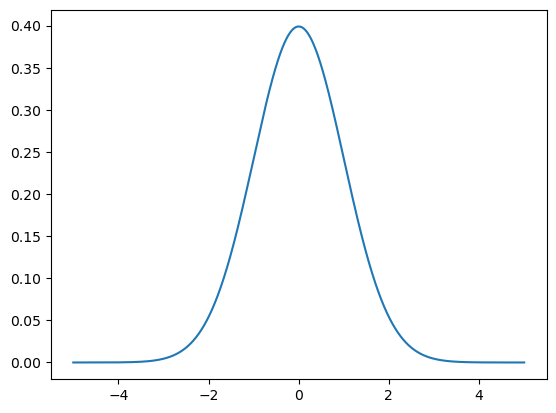

In [146]:
plt.plot(x,p)
plt.show()

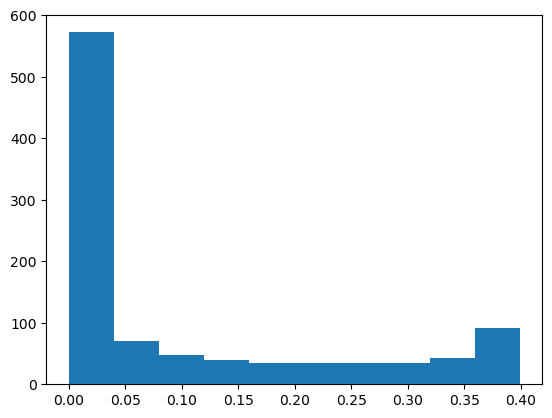

In [147]:
plt.hist(p, bins=10)
plt.show()

In [152]:
n = gaussian(0,0,1)

In [153]:
n

0.3989422804014327

## NumPy libraries

In [165]:
# data = np.random.normal(175,15,1000)
rng = np.random.default_rng(seed=64)

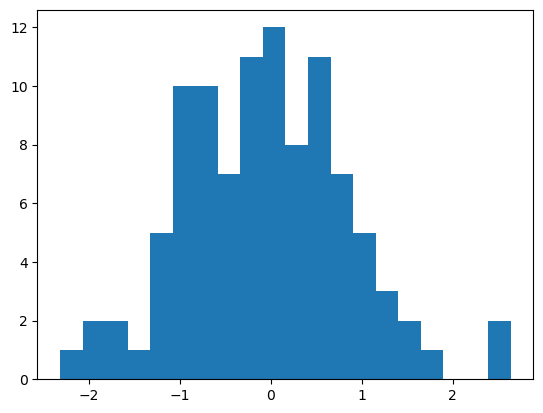

In [188]:
data = rng.normal(loc=0, scale=1, size=100)
plt.hist(data, bins=20)
plt.show()

# 2) Estimate the standard deviation and its error bar
On this dataset, estimate the standard deviation (ground truth
value of which is unity), and its error bar.
## a) In the first method for error bar estimation, do bootstrapping by selecting random halves of the data (e.g., 1000 random splits).

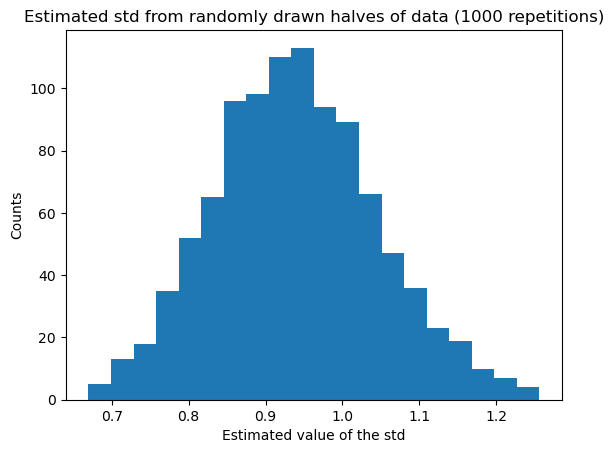

In [186]:
sample_size = int(data.size/2)
permutations = 1000
std_estimates1 = np.zeros(permutations)

# Estimate the stds for 1000 random subsets, each containing half of the data
for run in range(permutations):
    # 1) split the data into random halves
    sample = random.choices(data, k=sample_size)
    # 2) calculate the std and store the result
    std_estimates1[run] = np.std(sample)
    
plt.hist(std_estimates1, bins=20)
plt.title("Estimated std from randomly drawn halves of data (1000 repetitions)")
plt.xlabel("Estimated value of the std")
plt.ylabel("Counts")
plt.show()

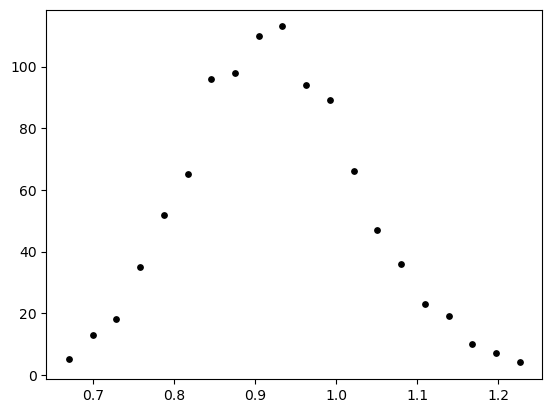

In [196]:
counts, bins = np.histogram(std_estimates1, bins=20)
plt.scatter(bins[:-1], counts, marker='o', s=15,color='k')
# plt.yerr

## b) In the second method, do bootstrapping by resampling (e.g., 1000 times) with replacement from the full dataset.

## In the third method, apply the Jackknife estimate. Compare the obtained error bar estimates.